<a href="https://colab.research.google.com/github/remziyeer/XAI/blob/main/ml_OpticsK%C3%BCmeleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler
from sklearn import datasets


#Verileri Yükleme


In [16]:
X=pd.read_csv("Iris.csv")
#Alakasız sütunları silmek
drop_features = ['Id', 'Species']
X = X.drop(drop_features, axis = 1)
# Varsa eksik değerlerin işlenmesi
X.fillna(method ='ffill', inplace = True)
X.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#Verileri Ön İşleme


Tüm özellikleri karşılaştırılabilir bir düzeye getirmek için verileri ölçeklendirme

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Verileri normalleştirme, böylece veriler
yaklaşık olarak bir Gauss dağılımını takip eder


In [18]:
X_normalized = normalize(X_scaled)

Numpy dizisini bir pandas DataFrame'e dönüştürme

In [19]:
X_normalized = pd.DataFrame(X_normalized)

Sütunları yeniden adlandırma

In [20]:
X_normalized.columns = X.columns
  
X_normalized.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.387617,0.444156,-0.577230,-0.565052
1,-0.519284,-0.056769,-0.609353,-0.596498
2,-0.579648,0.141360,-0.584998,-0.549365
3,-0.633543,0.044764,-0.540137,-0.552152
4,-0.411600,0.508921,-0.540264,-0.528866


#Kümeleme Modeli Oluşturma

OPTİK Kümeleme modelini oluşturma

In [21]:
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05)


Modeli eğitmek


In [22]:
optics_model.fit(X_normalized)

OPTICS(min_cluster_size=0.05, min_samples=10)

#Eğitimin sonuçlarının saklanması

Etiketlerin eps = 0.5 ile DBSCAN tekniğine göre üretilmesi

In [34]:
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 0.5)

Etiketleri eps = 2.0 ile DBSCAN tekniğine göre üretmek

In [24]:
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 2)

Belirtilen aralığa kadar eşit boşluklarda sayılarla bir numpy dizisi oluşturma

In [25]:
space = np.arange(len(X_normalized))

Her noktanın ulaşılabilirlik mesafesinin saklanması

In [26]:
reachability = optics_model.reachability_[optics_model.ordering_]


Her noktanın küme label lerinin saklanması

In [27]:
labels = optics_model.labels_[optics_model.ordering_]
  
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1
 -1 -1 -1 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


#Sonuçları görselleştirme


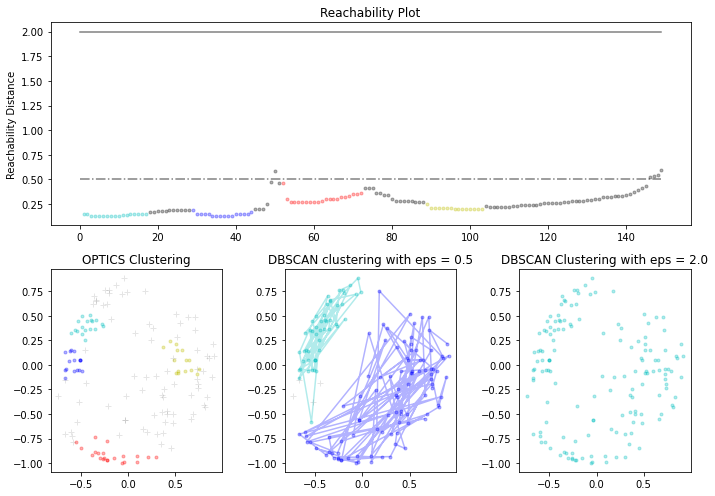

In [36]:
#Görselleştirme framework tanımlanması
plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

#Ulaşılabilirlik-Mesafe Grafiğinin Çizilmesi
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')

# OPTİK Kümelemesini Çizme
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = X_normalized[optics_model.labels_ == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
      
ax2.plot(X_normalized.iloc[optics_model.labels_ == -1, 0],
        X_normalized.iloc[optics_model.labels_ == -1, 1],
       'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')

# DBSCAN Kümelemesini eps = 0,5 ile çizme

colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
    Xk = X_normalized[labels1 == Class]
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')
        
ax3.plot(X_normalized.iloc[labels1 == -1, 0],
        X_normalized.iloc[labels1 == -1, 1],
       'k+', alpha = 0.1)
ax3.set_title('DBSCAN clustering with eps = 0.5')

# DBSCAN Kümelemesini eps = 2.0 ile çizme

colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
    Xk = X_normalized.iloc[labels2 == Class]
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
          
ax4.plot(X_normalized.iloc[labels2 == -1, 0],
        X_normalized.iloc[labels2 == -1, 1],
       'k+', alpha = 0.1)
ax4.set_title('DBSCAN Clustering with eps = 2.0')
  
  
plt.tight_layout()
plt.show()
